# Assignment 1: Pandas & Seaborn
## [Scientific Computing with Python](https://scicompy.yoavram.com/)
## Yoav Ram

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
import numpy as np
import urllib.request
import zipfile
import os.path
from datetime import datetime
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_palette('muted')

# General instructions

1. When instructed to implement a function, use the given function names and parameters lists; failure to do so may cause test functions to fail during grading.
1. When instructed to generate a plot, make sure that the plot is clear, that axes are propely labeled, and that the notebook is saved with the plot inline, so that the grader can see the plot without running the code. Make sure that you re-generate the plot if you changed the code!
1. Code lines with a triple comment `###` should not be removed or modified, they are used for automatic grading.
1. Note that there are 2 exercises and the last cell in the notebook says **end of assignment**; if you are missing anything please download the origianl file from the course website.
1. This exercise doesn't put much emphasis on efficieny or runtime. *But*, your code should still run within a reasonable time (a few minutes) and you should use idioms learned in class, e.g. array opreations, wherever possible to "lose your loops".
1. Questions regarding the exercises should be posted to the course forum at the designated group (i.e. "assignment1"). You can also visit the Office Hours, but please do not email the course staff with questions about the exercise.
1. Intructions for submitting the exercise are on the [course website](https://scicompy.yoavram.com/assignments).

# Exercise 1

In this question we will look for a relation between body mass of an adult and the body mass at birth weight in the animal kingdom.

For this analysis we will load the [AnAge](http://genomics.senescence.info/download.html#anage) dataset that we used in [lecture 1](../notebooks/pandas-seaborn.ipynb).

Get the zip file containing the data, extract it and read the data to a `DataFrame`. We are interested in the `Litter/Clutch size` and `Birth weight (g)` columns.

In [2]:
###
url = 'http://genomics.senescence.info/species/dataset.zip'
fname = '../data/anage_dataset.zip'
if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print("Data file exists:", os.path.exists(fname))

Data file exists: True


In [3]:
###
with zipfile.ZipFile(fname) as z:
    f = z.open('anage_data.txt')
    data = pd.read_table(f)

In [4]:
# Examining original dataset provided
data

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296"
1,5,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,6,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,8,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293
4,9,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,4239,Animalia,Porifera,Hexactinellida,Lyssacinosida,Rossellidae,Scolymastra,joubini,Hexactinellid sponge,NaN,...,688,wild,medium,questionable,NaN,NaN,NaN,NaN,NaN,688
4215,4241,Plantae,Pinophyta,Pinopsida,Pinales,Pinaceae,Pinus,longaeva,Great Basin bristlecone pine,NaN,...,1289,wild,medium,acceptable,NaN,999.00,NaN,NaN,NaN,"501,710,1289"
4216,4242,Fungi,Ascomycota,Saccharomycetes,Saccharomycetales,Saccharomycetaceae,Saccharomyces,cerevisiae,Baker's yeast,NaN,...,NaN,captivity,large,acceptable,NaN,NaN,NaN,NaN,NaN,"4,12,15,44,45,53,56,69,337,338,460,746,932,936..."
4217,4243,Fungi,Ascomycota,Schizosaccharomycetes,Schizosaccharomycetales,Schizosaccharomycetaceae,Schizosaccharomyces,pombe,Fission yeast,NaN,...,NaN,unknown,small,low,NaN,NaN,NaN,NaN,NaN,"772,878,1129"


If you examined the data you might have noticed that some rows have a `NaN` value in our columns of interest. 
We need to remove these rows from the data.
You can use `np.isnan`, `np.isfinite` or any other method you'd like.

In [45]:
# Removing any rows with NaN values in Birth Weight or Litters/Clutches
data = data.dropna(subset=['Birth weight (g)', 'Body mass (g)'])

In [46]:
assert not np.isnan(data['Body mass (g)']).any() ###
assert not np.isnan(data['Birth weight (g)']).any() ###

We are looking for a possible linear relationship between the variables.

Plot a scatter plot of the data, and consider if you should transform the data using a transformation such as log, square-root, reciprocal ($1/x$) or some other transformation that makes sense to you. 
Both columns might require transformations.

Plot a new scatter plot of the transformed data.

Don't forget the axes labels should change to reflect the transformation! 
But in the plot I left below I didn't put the name of the transformation I chose so that it is a _secret_...

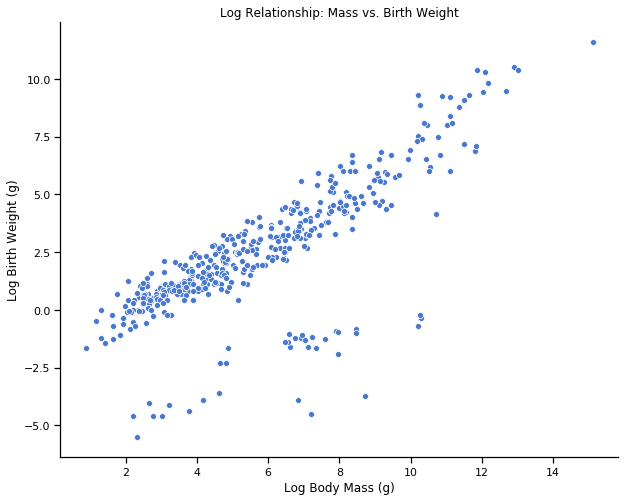

In [47]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = np.log(data['Body mass (g)']), y = np.log(data['Birth weight (g)']))
ax.set(title='Log Relationship: Mass vs. Birth Weight', 
        xlabel='Log Body Mass (g)', 
        ylabel='Log Birth Weight (g)')
sns.despine()

After applying a transformation for which there is a good correlation between the adult weight and the birth weight, create a linear model plot using Seaborn.

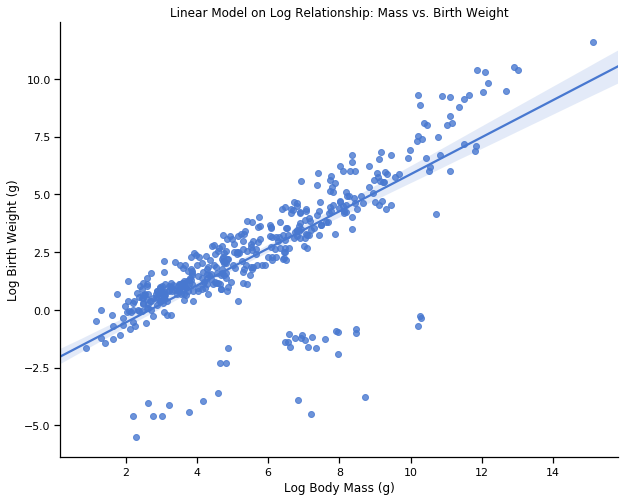

In [49]:
plt.figure(figsize=(10,8))
ax = sns.regplot(x,y)
ax.set(title='Linear Model on Log Relationship: Mass vs. Birth Weight', 
        xlabel='Log Body Mass (g)', 
        ylabel='Log Birth Weight (g)')
sns.despine()

Now we should be satisfied that there is a linear relationship between the variables.

Please perform linear regression on the transformed data using `scipy.stats.linregress`.
Print the intercept and slope of the regression.

Note that if you used a different transformation you might get different values; that's OK as long as your results make sense.

In [50]:
slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(x,y)

In [51]:
print("intercept: {:.3f}, slope: {:.3f}".format(intercept, slope)) ###

intercept: -2.149, slope: 0.802


Note that `linregress` provides a p-value for the null hypothesis that the slope is 0.

Think: What does it mean if the null hypothesis is rejected? 

Decide if the null hypothesis can be rejected and print a statement that summarizes the result regarding adult weight and birth weight.

Don't forget to print the p-value to support your claim.

In [56]:
print("p-value = {} \nAs the p-value equals zero, then there is a very high probability that we can reject the null hypothesis, \nand conclude that the positive relationship between adult weight and birth weight that we found \nis not a random result".format(pvalue))


p-value = 1.0604175476702822e-88 
As the p-value equals zero, then there is a very high probability that we can reject the null hypothesis, 
and conclude that the positive relationship between adult weight and birth weight that we found 
is not a random result


Finally, use the slope and intercept to predict the birth weight of offspring if the adult weight is 30kg (don't forget the transformation!).

In [57]:
birth_weight = slope * np.log(30000) + intercept
print("The expected birth weight of an adult that weights 30kg is {:.3f} grams"
      .format(np.exp(birth_weight)))

The expected birth weight of an adult that weights 30kg is 452.493 grams


# Exercise 2

In this exercise we will load COVID-19 case surveillance data and plot the number of cases in some countries.
The data is updated routinely by Imperial College London researchers: see [github repo](https://github.com/ImperialCollegeLondon/covid19model).

- **Download the file using Python's `urllib`** from <https://github.com/ImperialCollegeLondon/covid19model/raw/v1.0/data/COVID-19-up-to-date.csv>.
- **Load the data from the file using Pandas**
- **Convert the `dateRep` column to a timestamp** using `pd.to_datetime` and set the result to a new column `date`.

In [58]:
url = 'https://github.com/ImperialCollegeLondon/covid19model/raw/v1.0/data/COVID-19-up-to-date.csv'
fname = '../data/COVID-19-up-to-date'


In [59]:
if not os.path.exists(fname):
    urllib.request.urlretrieve(url, fname)
print("Data file exists:", os.path.exists(fname))

Data file exists: True


In [66]:
# Setting up new data df
covid_data = pd.read_csv(fname, encoding='latin-1', header=None)
header = covid_data.iloc[0]
covid_data = covid_data[1:]
covid_data.columns = header

covid_data.cases = covid_data.cases.astype(int)

In [67]:
# Adding another column with dateRep converted to timestamp
covid_data['date'] = covid_data['dateRep'].apply(lambda x : pd.to_datetime(x,dayfirst=True))


In [68]:
# Working on automatically recieving similar countries to Israel

covid_countries = pd.DataFrame(data=covid_data, columns=['countriesAndTerritories','popData2018'])
# Removing duplicates
covid_countries.drop_duplicates(keep='first', inplace=True)
# DropNAN
covid_countries.dropna(inplace=True)
# Convert to int
covid_countries['popData2018'] = covid_countries['popData2018'].astype(int)
# Sort by popdate
covid_countries.sort_values('popData2018',inplace=True)
covid_countries.reset_index(inplace=True)
# Finding the rank of Israel
il_rank = covid_countries[covid_countries['countriesAndTerritories'] == 'Israel'].index.tolist()


In [69]:
similar_counties = list(covid_countries.iloc[il_rank[0]-1:il_rank[0]+2]['countriesAndTerritories'])
similar_counties

['Austria', 'Israel', 'Belarus']

In [70]:
covid_similar_countries = covid_data[
    (covid_data['countriesAndTerritories'] == similar_counties[0]) | 
    (covid_data['countriesAndTerritories'] == similar_counties[1]) | 
    (covid_data['countriesAndTerritories'] == similar_counties[2])]

covid_similar_countries

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,date
415,28/03/2020,28,3,2020,668,16,Austria,AT,AUT,8847037,2020-03-28
416,27/03/2020,27,3,2020,1141,18,Austria,AT,AUT,8847037,2020-03-27
417,26/03/2020,26,3,2020,606,4,Austria,AT,AUT,8847037,2020-03-26
418,25/03/2020,25,3,2020,796,5,Austria,AT,AUT,8847037,2020-03-25
419,24/03/2020,24,3,2020,855,9,Austria,AT,AUT,8847037,2020-03-24
...,...,...,...,...,...,...,...,...,...,...,...
3551,04/01/2020,4,1,2020,0,0,Israel,IL,ISR,8883800,2020-01-04
3552,03/01/2020,3,1,2020,0,0,Israel,IL,ISR,8883800,2020-01-03
3553,02/01/2020,2,1,2020,0,0,Israel,IL,ISR,8883800,2020-01-02
3554,01/01/2020,1,1,2020,0,0,Israel,IL,ISR,8883800,2020-01-01


**Plot the number of daily case (`cases` column)** for Israel and two other countries with similar population size (which is in the `popData2018` column).

Don't forget axis labels and legends.

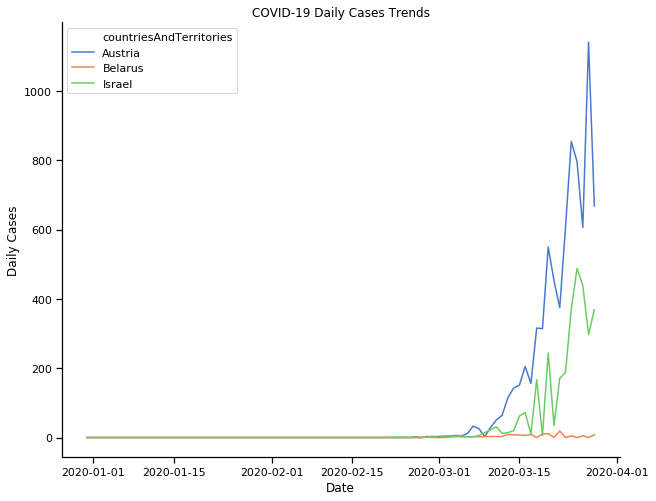

In [71]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='date', y='cases', 
            hue='countriesAndTerritories',
            data = covid_similar_countries)
ax.set(xlabel='Date', ylabel='Daily Cases', title='COVID-19 Daily Cases Trends')
sns.despine()

**Plot the number of daily case (`cases` column)** for the five largest countries in the world.

Try not to use country names but instead write generic code that finds the specific countries automatically.

Since the number of cases differs markedly, consider using a log scale.

In [72]:
largest_countries = list(covid_countries.iloc[-5:]['countriesAndTerritories'])
largest_countries

['Pakistan', 'Indonesia', 'United_States_of_America', 'India', 'China']

In [74]:
covid_largest_countries = covid_data[
    (covid_data['countriesAndTerritories'] == largest_countries[0]) | 
    (covid_data['countriesAndTerritories'] == largest_countries[1]) | 
    (covid_data['countriesAndTerritories'] == largest_countries[2]) |
    (covid_data['countriesAndTerritories'] == largest_countries[3]) | 
    (covid_data['countriesAndTerritories'] == largest_countries[4]) ]
covid_largest_countries

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,date
1406,28/03/2020,28,3,2020,134,3,China,CN,CHN,1392730000,2020-03-28
1407,27/03/2020,27,3,2020,111,5,China,CN,CHN,1392730000,2020-03-27
1408,26/03/2020,26,3,2020,121,6,China,CN,CHN,1392730000,2020-03-26
1409,25/03/2020,25,3,2020,99,4,China,CN,CHN,1392730000,2020-03-25
1410,24/03/2020,24,3,2020,99,7,China,CN,CHN,1392730000,2020-03-24
...,...,...,...,...,...,...,...,...,...,...,...
7167,04/01/2020,4,1,2020,0,0,United_States_of_America,US,USA,327167434,2020-01-04
7168,03/01/2020,3,1,2020,0,0,United_States_of_America,US,USA,327167434,2020-01-03
7169,02/01/2020,2,1,2020,0,0,United_States_of_America,US,USA,327167434,2020-01-02
7170,01/01/2020,1,1,2020,0,0,United_States_of_America,US,USA,327167434,2020-01-01


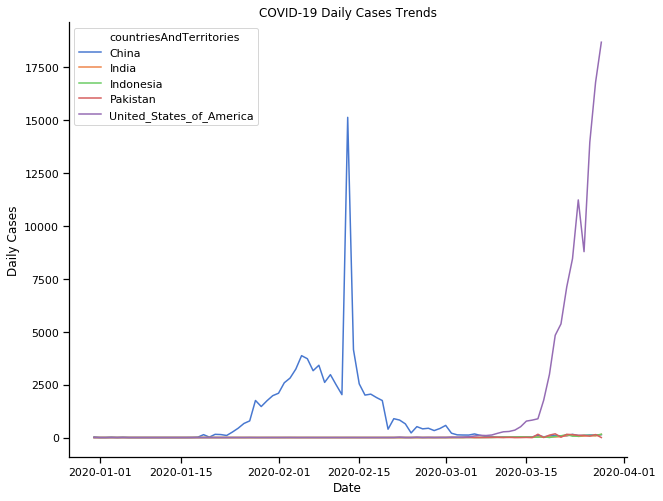

In [75]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='date', y='cases', 
            hue='countriesAndTerritories',
            data = covid_largest_countries)
ax.set(xlabel='Date', ylabel='Daily Cases', title='COVID-19 Daily Cases Trends')
sns.despine()

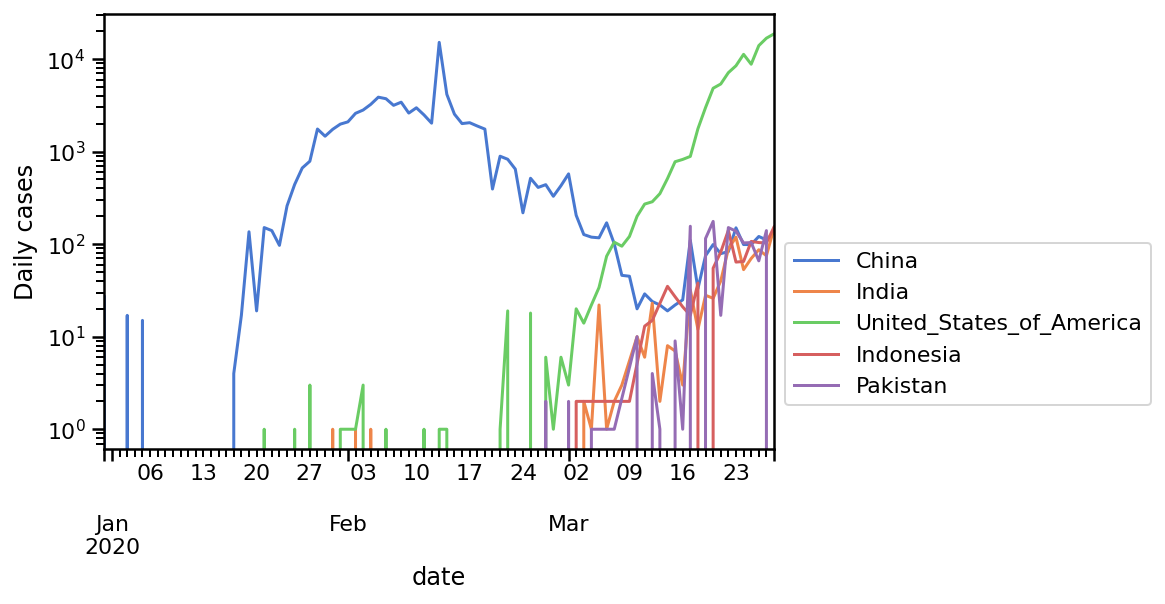

**Plot a linear model of the log of the number of daily cases in USA over time**:

- Create a `datetime` object for a starting date: March 1st, 2020
- Keep only the rows for USA
- Remove rows with a date earlier than the starting date
- Create a new column `day` for the number of days since the start date: note that substracting `datetime` object creates a `timedetla` object that has a `days` attribute.
- Create a new column `log-cases` that has the log of the `cases` column
- Use Seaborn's `lmplot` to plot a linear model of `log-cases` vs `day`.

In [76]:
start_date = datetime(2020, 3, 1)
covid_USA = covid_data[(covid_data['countryterritoryCode'] =='USA') & (covid_data['date'] >= start_date)]

In [78]:
covid_USA['day'] = covid_data['date'].apply(lambda x : (x - start_date).days)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
covid_USA['log-cases'] = covid_data['cases'].apply(lambda x: np.log(x))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 720x576 with 0 Axes>

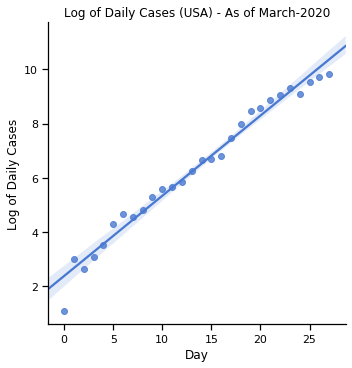

In [87]:
plt.figure(figsize=(10,8))
ax = sns.lmplot(x="day", y="log-cases", data=covid_USA)
ax.set(xlabel='Day', ylabel='Log of Daily Cases', title='Log of Daily Cases (USA) - As of March-2020')
sns.despine()

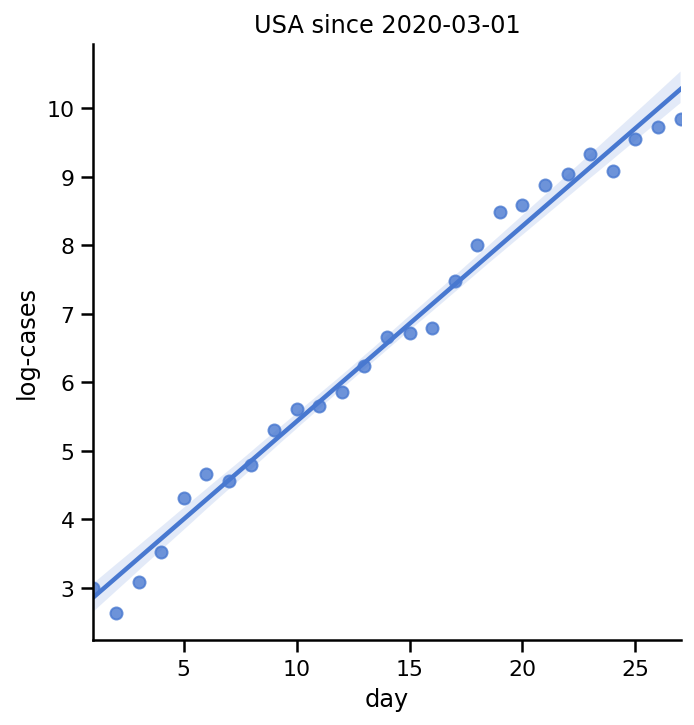

In [16]:
start_date = datetime(2020, 3, 1) ###

**End of assignment**